<a href="https://colab.research.google.com/github/KIMMOOKYONG/COLAB-NOTENOOK/blob/main/QStic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
!pip install pandas_ta

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [4]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import talib
import warnings
warnings.filterwarnings("ignore")

In [5]:
# 주가 데이터 다운로드 및 이동평균 칼럼 초기화
data = yf.download("AAPL", start="2020-01-01")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785927,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650780,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304420,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483604,132079200


In [7]:
ta.qstick(close=data["Close"], open_=data["Open"], length=5, offset=None)

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08    0.749001
                ...   
2022-06-17   -0.150003
2022-06-21    0.537994
2022-06-22    0.723999
2022-06-23    0.785999
2022-06-24    1.220041
Name: QS_5, Length: 625, dtype: float64

In [13]:
data.ta.qstick(length=5, offset=None, append=True)
data = data.dropna()
data.head()

,Open,High,Low,Close,Adj Close,Volume,QS_5
Date,,,,,,,
2020-01-14,79.175003,79.392502,78.042503,78.169998,76.814980,161954400,0.472498
2020-01-15,77.962502,78.875000,77.387497,77.834999,76.485786,121923600,0.145497
2020-01-16,78.397499,78.925003,78.022499,78.809998,77.443886,108829200,0.108496
2020-01-17,79.067497,79.684998,78.750000,79.682503,78.301262,137816400,0.244998
2020-01-21,79.297501,79.754997,79.000000,79.142502,77.770615,110843200,-0.052000


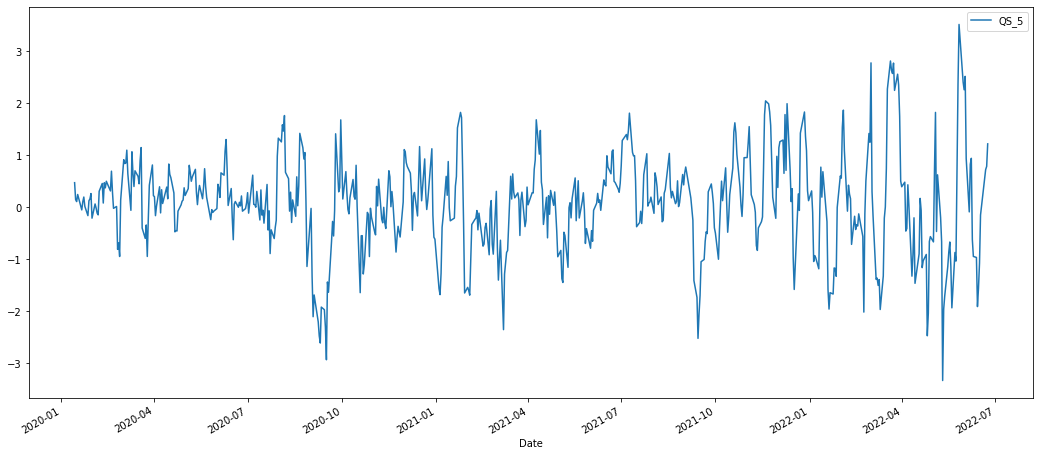

In [19]:
data[["QS_5"]].plot(figsize=(18, 8))